In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('Moving_Violations_Issued_in_September_2021.csv')

/Users/jaswanthsai/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
print("Total number of rows are: {} \nTotal number of columns are: {}".format(df.shape[0],df.shape[1]))

Total number of rows are: 70458 
Total number of columns are: 35


In [12]:
df.head()

,OBJECTID,TICKET_NUMBER,VIOLATION_TYPE_DESC,ISSUE_DATE,ISSUE_TIME,ISSUING_AGENCY_CODE,ISSUING_AGENCY_NAME,ISSUING_AGENCY_SHORT,VIOLATION_CODE,VIOLATION_PROCESS_DESC,...,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,GIS_LAST_MOD_DTTM,DRV_LIC_STATE,DOB_YEAR,VEH_YEAR,VEH_MAKE
0,33562749,264174621,M,2021/09/06 04:00:00+00,NaN,1,METROPOLITAN POLICE DPT-DISTRICT 1,MPD-1D,T185,MAKING A TURN FROM THE WRONG LANE,...,399407.410,133724.670,38.871,-77.007,313299.0,2021/10/12 21:19:57+00,VA,1978.0,NaN,HOND
1,33562755,275204086,M,2021/09/01 04:00:00+00,NaN,22,UNITED STATES PARK POLICE,USPP,T059,CHANGE LANES WITHOUT CAUTION,...,399213.581,134508.882,38.878,-77.009,900005.0,2021/10/12 21:19:57+00,FL,1989.0,NaN,NISS
2,33563016,276586321,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T654,VIOLATION OF ONE WAY STREET RESTRICTION,...,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV
3,33563017,276586332,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T711,OWNER OPERATE OR PERMIT OPERATION OF UNINSRD VEH,...,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV
4,33563018,276586343,M,2021/09/08 04:00:00+00,NaN,23,UNITED STATES CAPITOL POLICE,USCP,T333,FAIL TO DISPLAY PROOF OF VEHICLE INSURANCE,...,NaN,NaN,NaN,NaN,NaN,2021/10/12 21:19:57+00,VA,1999.0,NaN,VOLV


In [13]:
df.dtypes

OBJECTID                    int64
TICKET_NUMBER              object
VIOLATION_TYPE_DESC        object
ISSUE_DATE                 object
ISSUE_TIME                float64
ISSUING_AGENCY_CODE         int64
ISSUING_AGENCY_NAME        object
ISSUING_AGENCY_SHORT       object
VIOLATION_CODE             object
VIOLATION_PROCESS_DESC     object
LOCATION                   object
PLATE_STATE                object
ACCIDENT_INDICATOR         object
DISPOSITION_CODE          float64
DISPOSITION_TYPE           object
DISPOSITION_DATE           object
FINE_AMOUNT                 int64
TOTAL_PAID                  int64
PENALTY_1                 float64
PENALTY_2                 float64
PENALTY_3                 float64
PENALTY_4                 float64
PENALTY_5                 float64
RP_MULT_OWNER_NO          float64
BODY_STYLE                float64
XCOORD                    float64
YCOORD                    float64
LATITUDE                  float64
LONGITUDE                 float64
MAR_ID        

In [14]:
df.isnull().sum()

OBJECTID                      0
TICKET_NUMBER                 0
VIOLATION_TYPE_DESC           0
ISSUE_DATE                    0
ISSUE_TIME                70458
ISSUING_AGENCY_CODE           0
ISSUING_AGENCY_NAME           0
ISSUING_AGENCY_SHORT          0
VIOLATION_CODE                0
VIOLATION_PROCESS_DESC        0
LOCATION                      4
PLATE_STATE                   0
ACCIDENT_INDICATOR        67949
DISPOSITION_CODE          70345
DISPOSITION_TYPE              0
DISPOSITION_DATE          70345
FINE_AMOUNT                   0
TOTAL_PAID                    0
PENALTY_1                 70458
PENALTY_2                 70458
PENALTY_3                 70458
PENALTY_4                 70458
PENALTY_5                 70458
RP_MULT_OWNER_NO          69111
BODY_STYLE                70458
XCOORD                    15746
YCOORD                    15746
LATITUDE                  15746
LONGITUDE                 15746
MAR_ID                    15746
GIS_LAST_MOD_DTTM             0
DRV_LIC_

In [15]:
df.drop(['ISSUE_TIME', 'PENALTY_1','PENALTY_2','PENALTY_3','PENALTY_4','PENALTY_5','BODY_STYLE'], axis = 1,inplace = True)

In [16]:
df.describe()

,OBJECTID,ISSUING_AGENCY_CODE,DISPOSITION_CODE,FINE_AMOUNT,TOTAL_PAID,RP_MULT_OWNER_NO,XCOORD,YCOORD,LATITUDE,LONGITUDE,MAR_ID,DOB_YEAR,VEH_YEAR
count,7.045800e+04,70458.000000,113.000000,70458.000000,70458.000000,1.347000e+03,54712.000000,54712.000000,54712.000000,54712.000000,54712.000000,11300.000000,38722.000000
mean,3.363344e+07,24.340756,43.398230,134.373286,16.716157,7.486677e+08,400345.537725,136775.788920,38.898909,-76.995935,643900.324006,1977.220885,15.567894
std,2.947964e+04,3.836193,40.280166,78.000526,48.348908,3.835138e+08,3577.914717,3823.621648,0.034386,0.041287,285679.600399,14.871074,10.589392
min,3.356275e+07,1.000000,8.000000,5.000000,0.000000,1.062900e+07,390513.250000,128016.564000,38.820000,-77.109000,277.000000,1921.000000,1.000000
25%,3.362076e+07,25.000000,11.000000,100.000000,0.000000,9.500305e+08,398514.770000,134016.910000,38.874000,-77.017000,288753.000000,1967.000000,11.000000
50%,3.363840e+07,25.000000,12.000000,100.000000,0.000000,9.503244e+08,401550.690000,137186.890000,38.903000,-76.982000,805468.000000,1980.000000,16.000000
75%,3.365602e+07,25.000000,57.000000,150.000000,0.000000,9.504626e+08,403222.460000,139127.650000,38.920000,-76.963000,811650.000000,1989.000000,19.000000
max,3.367363e+07,89.000000,131.000000,2980.000000,916.000000,9.505406e+08,407601.590000,145360.660000,38.976000,-76.912000,913925.000000,2021.000000,99.000000


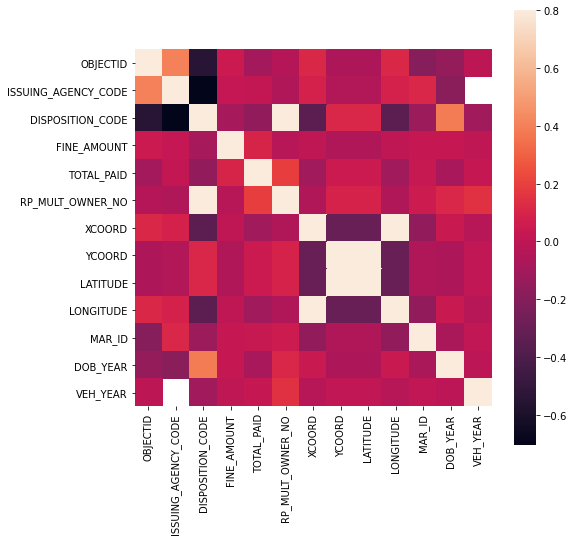

In [17]:
#visualization of correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corrmat, vmax=.8, square=True);